In [23]:
import numpy as np
import glob
import os

In [24]:
off_list = sorted(glob.glob('data/faust_off_ge_real/*.off'))
# print(off_list)

In [25]:
test_off = off_list[80:]
# print(test_off)

In [26]:
test_off[1]

'data/faust_off_ge_real/tr_reg_081.off'

In [27]:
# import trimesh

# mesh_faust=trimesh.load_mesh('./data/faust_off_ge/tr_reg_000.off',process=False)
# mesh_faust.show()

In [28]:
pwd

u'/home/lingjing/Lingjing_Wang/AAAI2018/lx/FeaStNet'

In [55]:
pred_list,gt_list = np.load('Result/pred_V6-18.npy')

In [33]:
pred_list,gt_list = np.load('Result/pred_V6-15.npy')

In [51]:
pred_list,gt_list = np.load('Result/pred_V6-10.npy')

In [39]:
float(np.count_nonzero(pred_list==gt_list))/(gt_list.shape[0]*gt_list.shape[1])

0.9950870827285921

In [41]:
float(np.count_nonzero(refine_pred_list==gt_list))/(gt_list.shape[0]*gt_list.shape[1])

0.9950798258345428

In [37]:
pred_list.shape, gt_list.shape

((20, 6890), (20, 6890))

In [36]:
root_dir = 'tmpfaust_lap_lxrefine'
if not os.path.exists(root_dir):
    os.mkdir(root_dir)
    print(root_dir)
else:
    os.system('rm -rf {}'.format(root_dir))
    os.mkdir(root_dir)

tmpfaust_lap_lxrefine


In [43]:
import time 
distance_all = []
for i in range(20):
    st = time.time()
    off_f = test_off[i]
    np.savetxt('{}/pred_{}.txt'.format(root_dir, i), refine_pred_list[i].astype('int32'))
    exec_str = './example0 '+off_f+' {}/pred_{}.txt'.format(root_dir,i)+' {}/distances_{}.txt'.format(root_dir,i)
    print(exec_str)
    os.system(exec_str)
    distance_cur = np.loadtxt('{}/distances_{}.txt'.format(root_dir,i))
    print('running time: ', time.time()-st, distance_cur.shape)
    distance_all.append(distance_cur[:6890].reshape((1,-1)))

./example0 data/faust_off_ge_real/tr_reg_080.off tmpfaust_lap_lxrefine/pred_0.txt tmpfaust_lap_lxrefine/distances_0.txt
('running time: ', 12.038275003433228, (6891,))
./example0 data/faust_off_ge_real/tr_reg_081.off tmpfaust_lap_lxrefine/pred_1.txt tmpfaust_lap_lxrefine/distances_1.txt
('running time: ', 20.774627923965454, (6891,))
./example0 data/faust_off_ge_real/tr_reg_082.off tmpfaust_lap_lxrefine/pred_2.txt tmpfaust_lap_lxrefine/distances_2.txt
('running time: ', 12.169985055923462, (6891,))
./example0 data/faust_off_ge_real/tr_reg_083.off tmpfaust_lap_lxrefine/pred_3.txt tmpfaust_lap_lxrefine/distances_3.txt
('running time: ', 14.39835500717163, (6891,))
./example0 data/faust_off_ge_real/tr_reg_084.off tmpfaust_lap_lxrefine/pred_4.txt tmpfaust_lap_lxrefine/distances_4.txt
('running time: ', 143.1649580001831, (6891,))
./example0 data/faust_off_ge_real/tr_reg_085.off tmpfaust_lap_lxrefine/pred_5.txt tmpfaust_lap_lxrefine/distances_5.txt
('running time: ', 19.380057096481323, (68

In [54]:
import time 
off_list = sorted(glob.glob('data/faust_off_ge_real/*.off'))
test_off = off_list[80:]

distance_all = []
for i in range(20):
    st = time.time()
#     off_f = test_off[i]
#     np.savetxt('tmp/pred_%d.txt' % (i), pred_list[i].astype('int32'))
#     exec_str = './example0 '+off_f+' tmp/pred_{}.txt'.format(i)+' tmp/distances_{}.txt'.format(i)
#     print(exec_str)
#     os.system(exec_str)
    distance_cur = np.loadtxt('tmp/distances_{}.txt'.format(i))
    print('running time: ', time.time()-st, distance_cur.shape)
    distance_all.append(distance_cur[:6890].reshape((1,-1)))

('running time: ', 0.03717303276062012, (6891,))
('running time: ', 0.0328068733215332, (6891,))
('running time: ', 0.03119492530822754, (6891,))
('running time: ', 0.03103804588317871, (6891,))
('running time: ', 0.031191110610961914, (6891,))
('running time: ', 0.03141498565673828, (6891,))
('running time: ', 0.03128504753112793, (6891,))
('running time: ', 0.034703969955444336, (6891,))
('running time: ', 0.0316929817199707, (6891,))
('running time: ', 0.031497955322265625, (6891,))
('running time: ', 0.03470182418823242, (6891,))
('running time: ', 0.04258918762207031, (6891,))
('running time: ', 0.0433499813079834, (6891,))
('running time: ', 0.046022891998291016, (6891,))
('running time: ', 0.032011985778808594, (6891,))
('running time: ', 0.030991077423095703, (6891,))
('running time: ', 0.031195878982543945, (6891,))
('running time: ', 0.032727956771850586, (6891,))
('running time: ', 0.031723976135253906, (6891,))
('running time: ', 0.03135085105895996, (6891,))


In [ ]:
# st = time.time()
# i=19
# off_f = test_off[i]
# np.savetxt('tmp/pred_%d.txt' % (i), pred_list[i].astype('int32'))
# exec_str = './example0 '+off_f+' tmp/pred_{}.txt'.format(i)+' tmp/distances_{}.txt'.format(i)
# print(exec_str)
# os.system(exec_str)
# distance_cur = np.loadtxt('tmp/distances_{}.txt'.format(i))
# print('running time: ', time.time()-st, distance_cur.shape)

In [44]:
for dis in distance_all:
    print(dis.max())

0.105954
0.13263
0.106445
0.112134
0.133838
0.137738
1.43572
0.110794
0.145839
0.102285
0.052535
0.169389
0.179216
0.154948
0.052973
0.111328
1.58908
1.20291
0.12235
0.0521245


In [45]:
distance_cmb = np.concatenate(distance_all,axis=0)

In [12]:
np.save('Result/faust_distance_real_Single_LLE.npy', distance_cmb)

In [58]:
np.save('Result/faust_distance_real_Single_noLLE.npy', distance_cmb)

In [47]:
np.save('Result/faust_distance_real_lap_refinelx.npy', distance_cmb)

In [75]:
distance_cmb = np.load('Result/faust_distance_real_Single_noLLE.npy')

In [32]:
distance_cmb = np.load('Result/faust_distance_diameter.npy')

In [48]:
np.max(distance_cmb) , np.mean(distance_cmb)

(1.58908, 0.0002120221799201742)

In [59]:
distance_diam = np.load('Result/faust_distance_diameter.npy')
distance_real = np.load('Result/faust_distance_real_lap_refinelx.npy')

In [72]:
distance_cmb.shape, distance_cmb.max(), distance_cmb.mean()

((20, 6890), 1.7918700000000001, 0.0016160737859216255)

In [57]:
#for diameter%
cnt = np.zeros((100,1))
for i in range(100):
    cnt[i] = np.count_nonzero(distance_cmb<=0.2*i/100.0) / float(20*6890)

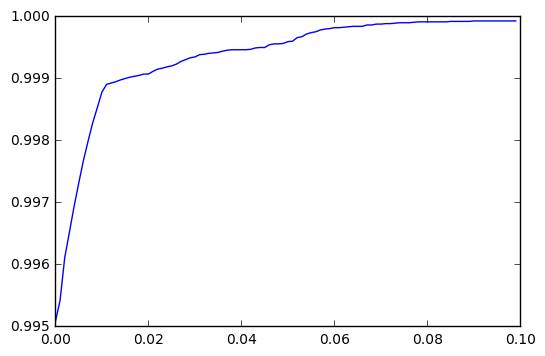

In [58]:
import matplotlib.pyplot as plt
plt.plot(0.1*np.arange(100)/100.0, cnt)
plt.show()

In [15]:
distance_real = distance_cmb

In [60]:
#for real distance
cnt = np.zeros((100,1))
distance_real = distance_real*100 #convert to cm
for i in range(100):
    cnt[i] = np.count_nonzero(distance_real<=20*i/100.0) / float(20*6890)

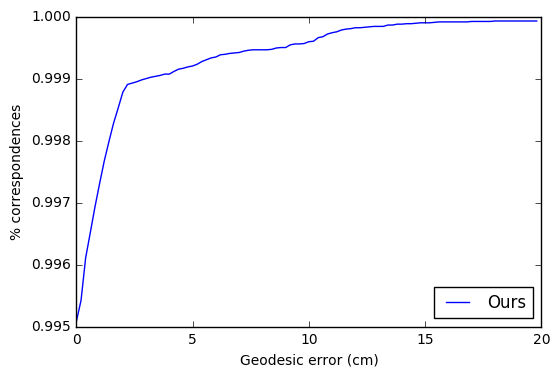

In [61]:
import matplotlib.pyplot as plt
plt.plot(20*np.arange(100)/100.0, cnt)
plt.xlabel('Geodesic error (cm)')
plt.ylabel('% correspondences')
plt.legend(['Ours'],loc=4)
# plt.savefig('Result/faust_distance_real.png',dpi=300)
plt.show()

In [30]:
offlist = sorted(glob.glob('/home/mmvc/Xiang_Li_BK/DL_DATA/EG16_tutorial/dataset/FAUST_registrations/meshes/orig/*.off'))

In [31]:
import trimesh

In [54]:
import scipy.spatial.distance as dis

In [49]:
offlist = sorted(glob.glob('/home/mmvc/Xiang_Li_BK/DL_DATA/EG16_tutorial/dataset/FAUST_registrations/meshes/orig/*.off'))

mesh = trimesh.load_mesh(offlist[0], process=False)
print(mesh.vertices.shape, mesh.faces.shape, mesh.vertices.min(), mesh.vertices.max())
print(mesh.area)

((6890, 3), (13776, 3), TrackedArray(-1.158032), TrackedArray(0.616928))
1.771880091452143


In [50]:
threshold = 0.1*np.sqrt(mesh.area)
print(threshold)

0.13311198636682361


In [ ]:
pred_refine = pred_list.copy()
for i in range(20):
    
    mesh = trimesh.load_mesh(offlist[80+i], process=False)
    distances = dis.pdist(mesh.vertices)
    distances = dis.squareform(distances)
    threshold = 0.05*np.sqrt(mesh.area)
    print(distances.shape, threshold)

    for iter in range(5):
        err_idx_cur = []
        for j in range(len(mesh.vertices)):
            nbrs = mesh.vertex_neighbors[j]
            if np.sum(distances[pred_refine[i][j]][pred_refine[i][nbrs]]>threshold)>0.5*len(nbrs):
    #             print(j, np.sum(distances[pred_refine[i][j]][pred_refine[i][nbrs]]>threshold),len(nbrs))
                err_idx_cur.append(j)
        
        print(iter, len(err_idx_cur), err_idx_cur[:5])
        
        for j in err_idx_cur:
            nearest_idx = np.argsort(distances[j])
            for ni in nearest_idx:
                if ni not in err_idx_cur:
                    pred_refine[i][j] = ni
                    break

In [20]:
for i in range(20):
    print(np.sum(pred_refine[i]==np.arange(6890))/6890.0)
print('mean acc', float(np.sum(pred_refine==gt_list))/(gt_list.shape[0]*gt_list.shape[1]))

0.997822931785196
0.9959361393323658
0.997822931785196
0.9972423802612482
0.9728592162554427
0.9963715529753265
0.995210449927431
0.9966618287373005
0.9888243831640058
0.997677793904209
0.9988388969521045
0.9970972423802612
0.9941944847605225
0.9966618287373005
0.9988388969521045
0.9972423802612482
0.9957910014513788
0.9966618287373005
0.9956458635703919
0.9941944847605225
('mean acc', 0.9950798258345428)


In [21]:
np.save('./Result/pred_FAUST_LAP_refinelx.npy', (pred_refine, gt_list))

In [42]:
refine_pred_list, gt_list = np.load('./Result/pred_FAUST_LAP_refinelx.npy')